# Datenanalyse Case Study Internet Movie Database

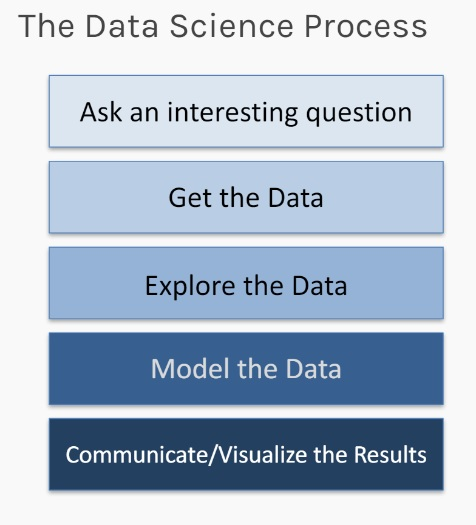

Quelle: Protopapas, Rader, Tanner, CS109 Data Science, 2020 [Link](https://github.com/Harvard-IACS/2020-CS109A/blob/master/content/lectures/lecture01/slides/Lecture1_Introduction.pdf)

In diesem Notebook analysieren wir einen einfachen Datensatz anhand der einzelnen Schritte des bekannten Data Science Workflows aus der Vorlesung.

Als Datensatz nehmen wir einen Auszug der Top 1000 Filme aus der Internet Movie Database. Es handelt sich hier wie gesagt um einen recht einfachen Datensatz, in der Realität haben Sie meist viel mehr Daten, Features und vor allem Data und Feature Engineering zu tun, um gute Ergebnisse zu erhalten.

## Schritt 1: Ask an interesting question

Der Beginn eines jeden Use Case Data Science ist die Festlegung, welche Fragestellungen wir untersuchen wollen.

Der Datensatz ist recht einfach, weshalb sich nur wenige Fragestellungen ansehen lassen. Aber für den Einstieg ist das in Ordnung.

Mögliche Fragestellungen wären:
- Was sind die am besten bewerteten Filme?
- Aus welchem Genre kommen die meisten Filme?
- Sind Western länger als andere Filme?

Bei den ersten beiden Fragen untersuchen wir **eine** definierte Variable, eine sogenannte **univariate Datenanalyse**.

Die Variablen werden auch **Features** genannt. Damit kann man erste Untersuchungen anstellen, für die meisten interessanten Fragestellungen muß man sich jedoch mehr als ein Feature ansehen. Man spricht dann von **multivariater Datenanalyse**.

Im späteren Verlauf der Vorlesung werden wir auch Hypothesen bilden und diese mittels Daten belegen oder widerlegen. Ein Beispiel wäre:

Hypothese 1: das beliebteste Genre ist Comedy.




## Schritt 2: Get the Data

Nachdem wir uns die zu untersuchenden Fragestellungen definiert haben, beschaffen wir uns die Daten.

Für das Laden und Auswerten der Daten gibt es in Python viele Programmbibliotheken, die uns die Detailarbeit abnehmen.

Am Beginn jedes Notebooks laden wir diese Libraries, den Code sehen Sie in der grauen Zelle unter dieser Zeile. Lila markierter Text sind Standard-Befehle der Programmiersprache Python, Kommentare werden mit einer Raute eingeleitet.

Gute, kostenfreie Kurse in Python sind in den Literaturquellen in der Vorlesung angegeben; Sie benötigen diese aber eigentlich nicht für die Umfänge der Vorlesung.

In [1]:
import pandas as pd   # Importieren Standard-Library für das Bearbeiten und Laden von Daten ("Data Engineering").
import matplotlib.pyplot as plt # Standard-Library für das Plotten von Graphen.
import seaborn as sns   # verschönert Matplotlib-Graphiken
import numpy as np # Standard-Library für Rechnen

In [2]:
# wir speichern den Pfad für die Datei in der Variable url_webpage
url_webpage = 'https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv'
IMDB_df = pd.read_csv(url_webpage, sep=',') # einzelnen Einträge in CSV sind durch , getrennt. Oft werden diese aber auch per ; getrennt

In [3]:
# Hochladen Datensatz über eine Eingabemaske von lokalem Rechner etc.
#from google.colab import files
#files.upload()
#IMDB_df = pd.read_csv('imdb_1000.csv', sep=',')

Für unser Beispiel sind die Daten, die wir bearbeiten wollen, als CSV (Comma Separated Values)-Datei gespeichert. Eine CSV-Datei ist eine Datei, in der die einzelnen Spalten bzw. Attribute oder Features durch Komma (oder manchmal Strichpunkt) voneinander getrennt sind. Dabei stellt dann jede Zeile ein Datenpunkt oder **Sample** dar.

Nachdem wir die Standard-Libraries importiert haben, laden wir die CSV-Datei mit den Filmen und ihren Daten in einen Standard-Datentyp der [Pandas-Library](https://pandas.pydata.org/pandas-docs/stable/index.html), dem sogenannten Dataframe.

Dataframes ist ein sehr häufig genutztes Datenformat in Data Science und AI. Sie können sich das als große Tabelle mit Spalten für die einzelnen Daten vorstellen.

In [4]:
# Geben Sie den Namen des Dataframes an und führen Sie die Zelle aus. Damit sehen Sie, ob das Einlesen funktioniert hat
IMDB_df

star_rating                                            title  \
0            9.3                         The Shawshank Redemption   
1            9.2                                    The Godfather   
2            9.1                           The Godfather: Part II   
3            9.0                                  The Dark Knight   
4            8.9                                     Pulp Fiction   
..           ...                                              ...   
974          7.4                                          Tootsie   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
977          7.4                                      Poltergeist   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
0                R      Crime       142   
1                R      Crime       175   
2                R      Crime       200   
3            PG-13     Action       152   
4                R      Crime       154   
..             ...        ...       ...   
974             PG     Comedy       116   
975             PG  Adventure       118   
976          PG-13     Action       138   
977             PG     Horror       114   
978              R      Crime       126   

                                           actors_list  
0    [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1      [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2    [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3    [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4    [u'John Travolta', u'Uma Thurman', u'Samuel L....  
..                                                 ...  
974  [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...  
975  [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...  
976  [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...  
977  [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...  
978  [u'Charlie Sheen', u'Michael Douglas', u'Tamar...  

[979 rows x 6 columns]

## Schritt 3: Explore the data

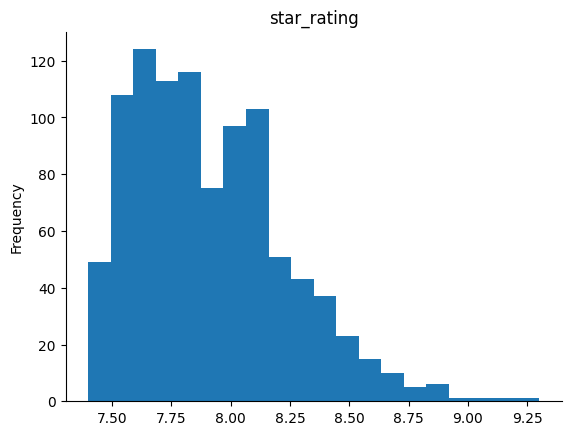

In [5]:
# @title star_rating

from matplotlib import pyplot as plt
IMDB_df['star_rating'].plot(kind='hist', bins=20, title='star_rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

Wir schauen uns das Dataset genauer an.
Wir werden in diesem Abschnitt folgendes machen:
* deskriptive Analytics. Wie ist die Datei aufgebaut? Was steht da drinnen?
* nach Nullwerte schauen und ggf. ersetzen
* Entdecken von Ausreißern oder Anomalien
* Entdecken von Mustern


In [6]:
IMDB_df.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

Wir schauen uns die Datentypen an, damit wir wissen, welche Variablen wir haben. Plots können wir für folgende Typen durchführen:
* float64 = Reelle Zahlen
* int64 = Ganzzahlen
* Categorical

Das heißt, für die Object-Datentypen (Spalten title, content_rating, genre, actors_lost) müssen wir die Datentypen - falls sinnvoll- auch in Zahlentypen umwandeln.

Das is eine der Hauptaufgaben von Data Engineering und kommt in einer der folgenden Stunden.

In [7]:
# Schauen Sie sich die ersten 10 Zeilen des Dataframes an
IMDB_df.head(10)

star_rating                                          title content_rating  \
0          9.3                       The Shawshank Redemption              R   
1          9.2                                  The Godfather              R   
2          9.1                         The Godfather: Part II              R   
3          9.0                                The Dark Knight          PG-13   
4          8.9                                   Pulp Fiction              R   
5          8.9                                   12 Angry Men      NOT RATED   
6          8.9                 The Good, the Bad and the Ugly      NOT RATED   
7          8.9  The Lord of the Rings: The Return of the King          PG-13   
8          8.9                               Schindler's List              R   
9          8.9                                     Fight Club              R   

       genre  duration                                        actors_list  
0      Crime       142  [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...  
1      Crime       175    [u'Marlon Brando', u'Al Pacino', u'James Caan']  
2      Crime       200  [u'Al Pacino', u'Robert De Niro', u'Robert Duv...  
3     Action       152  [u'Christian Bale', u'Heath Ledger', u'Aaron E...  
4      Crime       154  [u'John Travolta', u'Uma Thurman', u'Samuel L....  
5      Drama        96  [u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...  
6    Western       161  [u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...  
7  Adventure       201  [u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...  
8  Biography       195  [u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...  
9      Drama       139  [u'Brad Pitt', u'Edward Norton', u'Helena Bonh...

Wir sehen die zehn best bewerteten Filme. Damit wäre die erste Frage aus Schritt 1 schon beantwortet :-)

In [8]:
# die letzten 10 schauen Sie sich per tail an
IMDB_df.tail(10)

star_rating                                            title  \
969          7.4                              Law Abiding Citizen   
970          7.4                                      Wonder Boys   
971          7.4                               Death at a Funeral   
972          7.4                                   Blue Valentine   
973          7.4                            The Cider House Rules   
974          7.4                                          Tootsie   
975          7.4                      Back to the Future Part III   
976          7.4  Master and Commander: The Far Side of the World   
977          7.4                                      Poltergeist   
978          7.4                                      Wall Street   

    content_rating      genre  duration  \
969              R      Crime       109   
970              R      Drama       107   
971              R     Comedy        90   
972          NC-17      Drama       112   
973          PG-13      Drama       126   
974             PG     Comedy       116   
975             PG  Adventure       118   
976          PG-13     Action       138   
977             PG     Horror       114   
978              R      Crime       126   

                                           actors_list  
969  [u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']  
970  [u'Michael Douglas', u'Tobey Maguire', u'Franc...  
971  [u'Matthew Macfadyen', u'Peter Dinklage', u'Ew...  
972  [u'Ryan Gosling', u'Michelle Williams', u'John...  
973  [u'Tobey Maguire', u'Charlize Theron', u'Micha...  
974  [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...  
975  [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...  
976  [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...  
977  [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...  
978  [u'Charlie Sheen', u'Michael Douglas', u'Tamar...

### Schritt 3.1: Deskriptive Analyse

Machen wir weiter mit der deskriptiven Analyse.
Ein guter Einstieg ist der Befehl describe von Pandas. Wir schauen uns später noch eine bessere Methode an, die vieles für uns abdeckt (Pandas Profiling).

In [10]:
# Verwenden Sie die Methode describe mit Parameter include='all auf Ihr Dataframe
IMDB_df.describe(include='all')

star_rating    title content_rating  genre    duration  \
count    979.000000      979            976    979  979.000000   
unique          NaN      975             12     16         NaN   
top             NaN  Dracula              R  Drama         NaN   
freq            NaN        2            460    278         NaN   
mean       7.889785      NaN            NaN    NaN  120.979571   
std        0.336069      NaN            NaN    NaN   26.218010   
min        7.400000      NaN            NaN    NaN   64.000000   
25%        7.600000      NaN            NaN    NaN  102.000000   
50%        7.800000      NaN            NaN    NaN  117.000000   
75%        8.100000      NaN            NaN    NaN  134.000000   
max        9.300000      NaN            NaN    NaN  242.000000   

                                              actors_list  
count                                                 979  
unique                                                969  
top     [u'Daniel Radcliffe', u'Emma Watson', u'Rupert...  
freq                                                    6  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

Wir können hier schon einige deskriptive Sachen ableiten:
* **Zeile Count**: wir haben in allen Spalten bis auf Content_rating 979 Werte, d.h. bei content_rating fehlen 3 Werte oder die Filme sind nicht bewertet
* **Zeile unique**: Es gibt 12 verschiedene ratings und 16 verschiedene Genres. 975 von 979 Titeln eindeutig, d.h. 4 Filme mit gleichem Namen.
* **Zeile Top**: was die häufigsten Werte sind in einer Spalte mit mehreren gleichen Einträgen, z.B. Dracula bei title oder R bei rating.
* **Zeile Frequency**: wie häufig der top Eintrag vorkommt, bspw. 460 mal R rating
* **Zeile mean**: Mittelwert, z.B. 7,8 beim Star Rating
* **Zeile Std**: Standardabweichung, d.h. durchschnittliche Breite der Streuung einzelner Werte um den Mittelwert herum.
* **Zeile min**: geringster Wert, bspw. 7,4 für Star rating
* **Zeile max**: höchster Wert, bspw. 9,3 für Star rating
* **Zeile 50%**: dieser auch Median genannte Wert, der genau in der Mitte der Daten liegt, d.h. er teilt die Daten der Spalte in 2 genau gleich große Untermengen (Beispiel: für die Menge 1, 3, 4, 10, 15, 20, 40 ist 10 der Median, da links und rechts jeweils 3 Elemente sind). Bei einer Menge mit einer geraden Anzahl werden die "beiden Mitten" durch 2 geteilt und dieser Wert als Median genommen.
* **Zeile 25%**, das untere Quantil. Teilt die untere Teilmenge kleiner 50% wiederum in 2 gleich große Mengen. Wir erhalten die Zahl, die die untere Teilmenge geteilt hat. Diese Zahl ist somit größer als 25% der Daten (Beispiel: aus der oberen Menge erhalten wir 1, 3, 4. Somit ist 3 der Median der unteren Menge und dadurch das 25% Quantil der gesamten Menge).
* **Zeile 75%**, das obere Quantil. Teilt die obere Teilmenge wiederum in 2 gleich große Mengen. Wir erhalten einen Wert, der größer ist als 75% der Werte.

Die deskriptive Analyse hilft uns, schnell wesentliche Eigenschaften eines Datensatzes zu erkennen.

### Schritt 3.2: Explorative Datenanalyse

In diesem Schritt versuchen wir mittels Visualisierungen Muster in den Daten, Ausreisser/ Anomalien und sogar Hypothesen zu formulieren bzw. widerlegen.

###3.2.1 Pandas Profiling/ YData Profiling

Dokumentation: https://www.influxdata.com/blog/pandas-profiling-tutorial/, https://docs.profiling.ydata.ai/latest/ oder https://github.com/ydataai/ydata-profiling?tab=readme-ov-file

In [11]:
# wir laden zuerst die notwendigen Libraries
!pip install ydata-profiling
from ydata_profiling import ProfileReport

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.4/400.4 kB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 4.6 MB/s eta 0:00:00


In [12]:
profile = ProfileReport(IMDB_df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 6/6 [00:00<00:00, 41.92it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Welche Erkenntnisse können Sie daraus ziehen?

### 3.2.2 PygWalker

In diesem einführenden Notebook verwenden wir PyGWalker, ein Visualisierungs-Framework, das [Tableau](https://www.tableau.com/de-de) ähnelt.

Wir werden erst PygWalker im Notebook installieren und dann für Graphen verwenden. Eine ausführliche Doku zu PyGWalker finden Sie [hier](https://docs.kanaries.net/de/pygwalker), [hier](https://docs.kanaries.net/de/rath/data-viz/create-data-viz) oder [hier](https://www.datamasteryacademy.com/blog/pygwalker-tutorial-a-tableau-like-python-library-for-interactive-data-exploration-and-visualization).

Im u.a. Bild sehen Sie die verschiedenen Visualisierungen, die PyGWalker anbietet. In späteren Vorlesungen werden wir uns Matplot-Lib ansehen, das zwar deutlich detailliertere Graphiken erstellen kann, aber auch komplizierter zu bedienen ist.

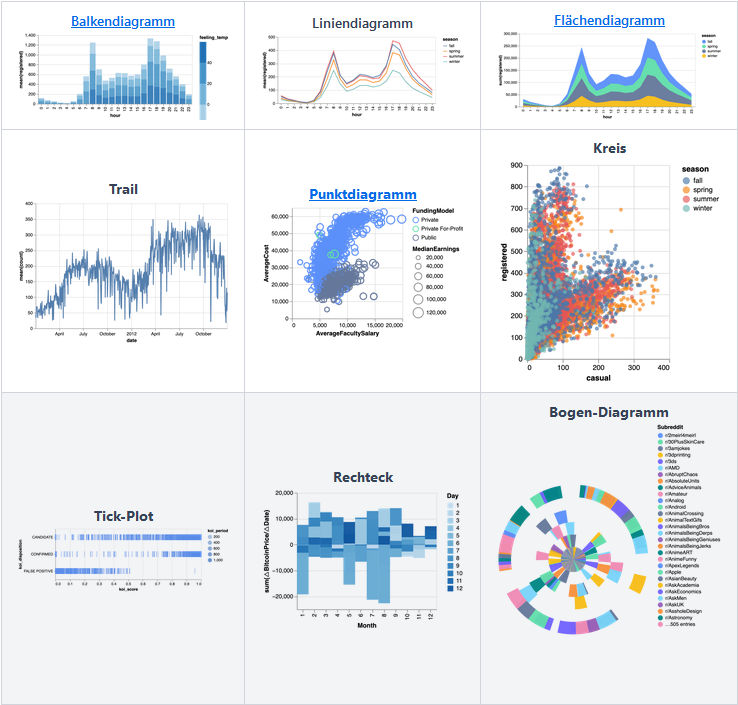

Quelle: [Link](https://docs.kanaries.net/de/rath/data-viz/create-data-viz)

Nun können wir PygWalker verwenden und werden folgende Visualisierungen erstellen.
* Was ist die häufigste Länge eines Filmes? (Balkendiagramm: duration. Sie müssen Duration aber als "dimensional" Variable "hochziehen")
* Was ist das häufigste Rating eines Filmes? (wie vorige Auswertung, aber probieren Sie doch verschiedene Darstellungen über Button "Mark type" aus)
* Gibt es einen Zusammenhang zwischen Filmlänge und Rating? (Violinplot/ Scatterplot: x = star_rating und y = duration)
* Gibt es einen Zusammenhang zwischen Filmgenre und Rating? (Stripplot/ Boxplot: genre vs. star_rating)
* Gibt es Zusammenhänge zwischen Länge, Rating und Genre? (Violinplot/Scatterplot: star_rating vs. Duration mit hue=content_rating)

Die bisherigen Auswertungen haben wir für jeweils alle Daten gemacht. Wir können aber auch die Datenmenge filtern, bspw. für ein bestimmtes Genre wie Crime. Machen Sie doch die oberen Auswertungen nur für das Genre Crime!


In [13]:
# mit diesem Befehl installieren Sie pygwalker in dem Notebook.
# der parameter -q sorgt dafür, daß keine weiteren Bildschirmausgaben erfolgen
!pip install pygwalker -q
import pygwalker as pyg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 956.2/956.2 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 11.7 MB/s eta 0:00:00


In [14]:
walker = pyg.walk(
    IMDB_df,
    spec="./chart_meta_1.json",    # this json file will save your chart state, you need to click save button in ui mannual when you finish a chart, 'autosave' will be supported in the future.
    use_kernel_calc=True,          # set `use_kernel_calc=True`, pygwalker will use duckdb as computing engine, it support you explore bigger dataset(<=100GB).
)

Box(children=(HTML(value='\n<div id="ifr-pyg-00064937d663e529H0BCndJZhlqf2kK4" style="height: auto">\n    <hea…

Um die Plots permanent abzuspeichern, müssen Sie im Menü auf den Save Button klicken und anschließend eine der u.a. Code-Zeilen ausführen.

In [ ]:
# per PyGWalker
walker.display_chart("Häufigste Länge")

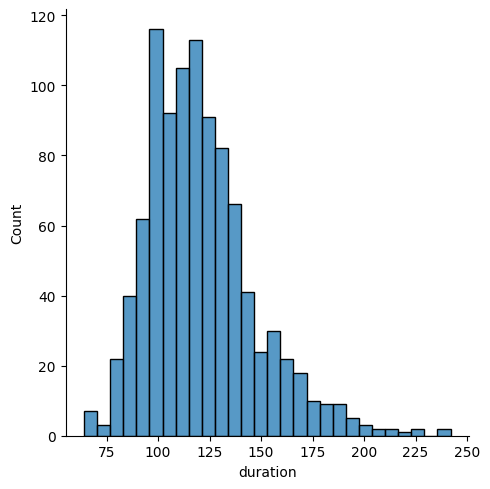

In [15]:
ax = sns.displot(data=IMDB_df, x="duration")

In [ ]:
walker.display_chart("Häufigsten Genres")

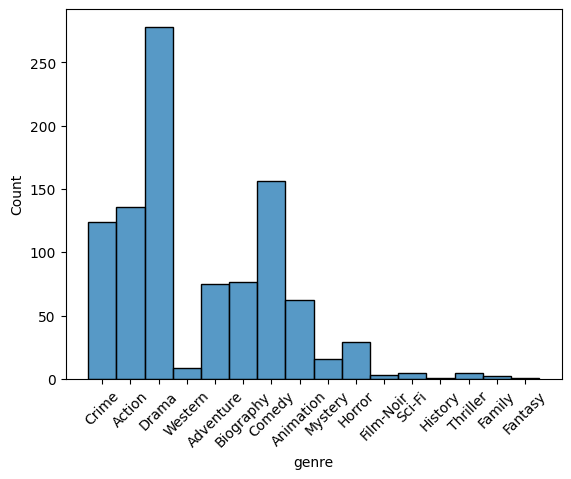

In [16]:
ax = sns.histplot(x="genre", data= IMDB_df);
plt.xticks(rotation=45);

In [ ]:
walker.display_chart("Genre vs Rating")

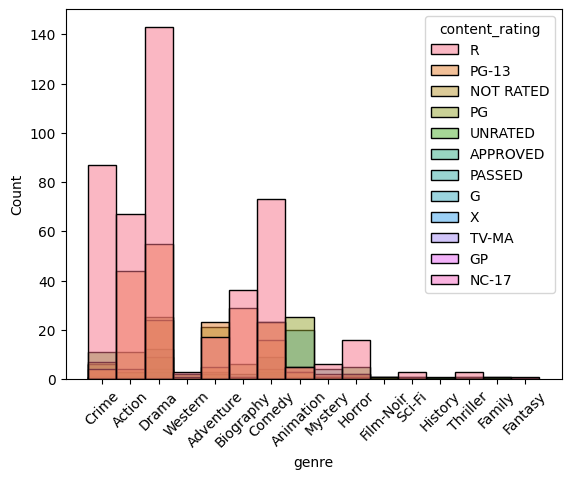

In [17]:
ax = sns.histplot(x="genre", hue="content_rating", stat="count", data=IMDB_df);
plt.xticks(rotation=45);

/tmp/ipython-input-1396533505.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


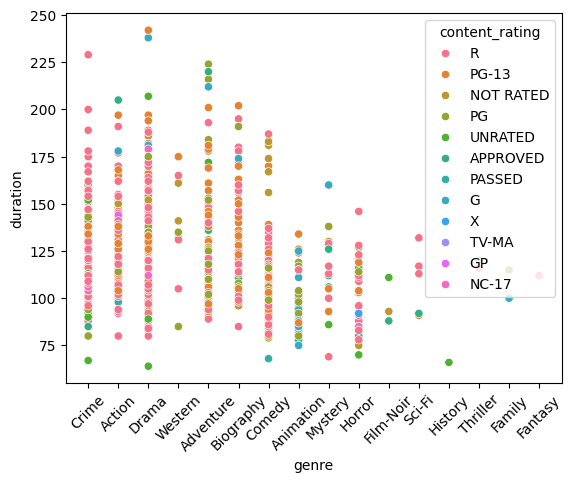

In [18]:
ax = sns.scatterplot(x="genre", y="duration", hue="content_rating", data= IMDB_df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [ ]:
walker.display_chart("Besten Thriller")

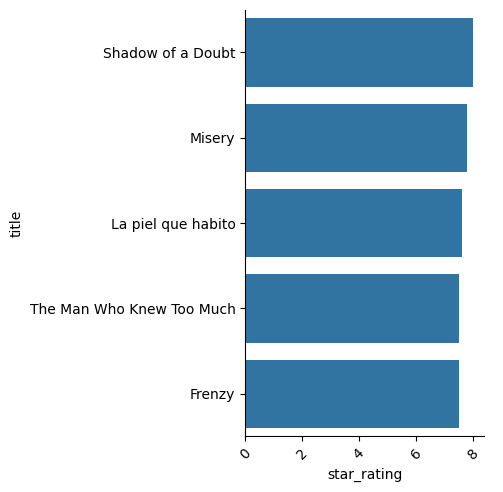

In [19]:
ax = sns.catplot(y="title", x="star_rating", data=IMDB_df[IMDB_df['genre']=='Thriller'], kind="bar");
plt.xticks(rotation=45);

### 3.2.3 Code selber schreiben

Entweder per ChatGPT oder ähn

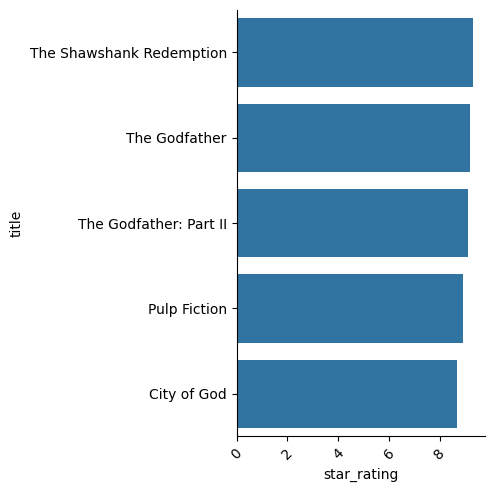

In [20]:
# prompt: show me the best 5 movies of genre "Crime" as histogram

ax = sns.catplot(y="title", x="star_rating", data=IMDB_df[IMDB_df['genre']=='Crime'].nlargest(5, 'star_rating'), kind="bar");
plt.xticks(rotation=45);


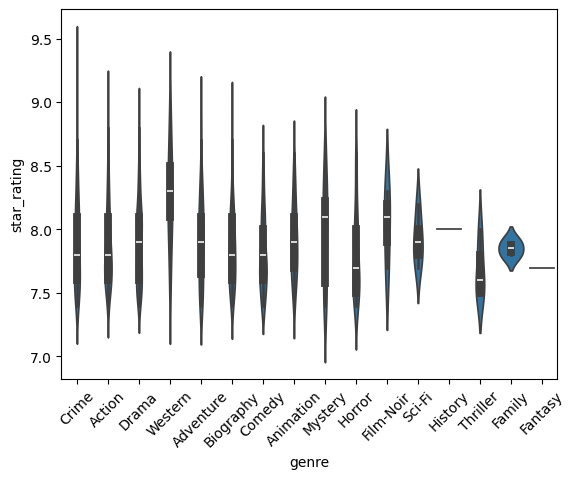

In [21]:
# prompt: a violinplot over genre and rating

ax = sns.violinplot(x='genre', y='star_rating', data=IMDB_df)
plt.xticks(rotation=45)
plt.show()
